### Papers 

- [Predicting the properties of black holes merger remnants with Deep Neural Networks](https://arxiv.org/abs/1911.01496)
- [The SXS Collaboration catalog of binary black hole simulations](https://arxiv.org/abs/1904.04831)
- [Deep Learning for Real-time Gravitational Wave Detection and Parameter Estimation: Results with Advanced LIGO Data](https://arxiv.org/abs/1711.03121)



### Other Links 

- [SXS Collaboration catalog](https://data.black-holes.org/waveforms/index.html)
- [Github repo of SXS Collaboration catalog](https://github.com/sxs-collaboration/catalog_tools)
- [Rit catalog](https://ccrg.rit.edu/content/data/rit-waveform-catalog)
- [lal simulation](https://lscsoft.docs.ligo.org/lalsuite/lalsimulation/classlalsimulation_1_1nrfits_1_1_n_r_sur7dq4_remnant_1_1_n_r_sur7dq4_remnant.html)
- [Visualizations](https://vijayvarma392.github.io/SurrogateMovie)


## To do 

**@David**
- Outliers: check the ones w remnant_mass > 1.5, and the ones with m1+m2 < 1


**@Cami**
- Preprocessing: feat eng
- Apply model from paper
- User stratified sampling? 

**Extra** 
- Extract all data and check that all simulations have the same data over time
- Use Monte Carlo to include error in the mass ratio


In [2]:
import numpy as np
import pandas as pd
import random
#from sklearn import linear_model
#from sklearn.metrics import mean_absolute_error, mean_squared_error
#from sklearn.linear_model import LogisticRegression
#from sklearn.model_selection import train_test_split
#from sklearn import preprocessing
#from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import itertools
import h5py


In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

### Input data: Catalog.json

In [4]:
df = pd.read_json('catalog.json')

In [5]:
df.columns

Index(['url', 'simulation_name', 'alternative_names', 'initial_data_type',
       'object_types', 'number_of_orbits', 'reference_mass_ratio',
       'reference_chi_eff', 'reference_chi1_perp', 'reference_chi2_perp',
       'reference_eccentricity', 'reference_dimensionless_spin1',
       'reference_dimensionless_spin2', 'reference_orbital_frequency',
       'reference_mass1', 'reference_mass2', 'reference_time',
       'reference_position1', 'reference_position2', 'reference_mean_anomaly',
       'keywords', 'point_of_contact_email', 'authors_emails',
       'simulation_bibtex_keys', 'code_bibtex_keys',
       'initial_data_bibtex_keys', 'quasicircular_bibtex_keys',
       'initial_separation', 'initial_orbital_frequency', 'initial_adot',
       'object1', 'object2', 'initial_ADM_energy',
       'initial_ADM_linear_momentum', 'initial_ADM_angular_momentum',
       'initial_mass1', 'initial_mass2', 'initial_dimensionless_spin1',
       'initial_dimensionless_spin2', 'initial_position1',

In [6]:
df.head(2)

,url,simulation_name,alternative_names,initial_data_type,object_types,number_of_orbits,reference_mass_ratio,reference_chi_eff,reference_chi1_perp,reference_chi2_perp,reference_eccentricity,reference_dimensionless_spin1,reference_dimensionless_spin2,reference_orbital_frequency,reference_mass1,reference_mass2,reference_time,reference_position1,reference_position2,reference_mean_anomaly,keywords,point_of_contact_email,authors_emails,simulation_bibtex_keys,code_bibtex_keys,initial_data_bibtex_keys,quasicircular_bibtex_keys,initial_separation,initial_orbital_frequency,initial_adot,object1,object2,initial_ADM_energy,initial_ADM_linear_momentum,initial_ADM_angular_momentum,initial_mass1,initial_mass2,initial_dimensionless_spin1,initial_dimensionless_spin2,initial_position1,initial_position2,relaxation_time,common_horizon_time,remnant_mass,remnant_dimensionless_spin,remnant_velocity,metadata_version,spec_revisions,spells_revision,com_parameters,initial_mass_ratio,metadata_path,name,eos,merger_time,final_time,disk_mass,ejecta_mass,reference_spin1,reference_spin2,nitial_spin1,initial_spin2,remnant_spin,initial_mass_withspin2
0,https://doi.org/10.5281/zenodo.1212426,d18.0_q1.0_s0_0_0_s0_0_0/Lev5,SXS:BBH:0001,BBH_CFMS,BHBH,28.119083,1.0,1.215639e-07,9.733309e-10,1.429939e-09,0.0002569,"[7.09752141352e-10, -6.66051760901e-10, 1.2093...","[5.84453420303e-10, 1.3050444511300001e-09, 1....","[2.8280852361099996e-13, -8.251591712050001e-1...",0.5,0.5,320.0,"[-6.4605628809799995, -6.21953367941, -3.37886...","[6.46056317772, 6.21953399104, 2.00589477099e-10]",3.083240,"[Non-Spinning, ManyMergers-QuasiCircular]",mroue@cita.utoronto.ca,"[Mike Boyle <boyle@astro.cornell.edu>, Dan Hem...","[Mroue:2013xna, Boyle:2019kee, SXSCatalogWebsite]","[Ossokine:2013zga, Hemberger:2012jz, Szilagyi:...","[Buchman:2012dw, Lovelace:2008tw, Pfeiffer:200...","[Mroue:2012kv, Buonanno:2010yk, Mroue:2010re, ...",18.0,0.012203,-0.000025,bh,bh,0.993736,"[7.5160071e-09, 2.4389069e-09, -5.798632e-10]","[4.27581822e-08, -2.3426250729999996e-07, 1.18...",0.5,0.5,"[-6.35700000002e-13, 4.72400000001e-13, 1.0250...","[4.4999999999800006e-15, -2.8e-15, 1.559379999...","[9.000000125802465, -2.8664642100000002e-08, 0]","[-8.999999874197535, -2.8664642100000002e-08, 0]",320.0,9524.085983,0.951609,"[-7.29520687012e-10, 7.40468371215e-10, 0.6864...","[1.45734870604e-09, 7.51603528474e-10, 3.72053...",1,"[InitialCommit-20603-g8a2e9b6, InitialCommit-2...",InitialCommit-21848-g8d8a7d7,"{'space_translation': [3.6668214400000003e-08,...",1.0,SXS:BBH:0001v6/Lev5/metadata.json,SXS:BBH:0001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,https://doi.org/10.5281/zenodo.1210580,d19.0_q1.0_s0_0_0_s0_0_0/Lev6,SXS:BBH:0002,BBH_CFMS,BHBH,32.421068,1.0,9.399402e-08,7.181763e-10,1.473155e-09,0.0001746,"[6.50756283834e-10, -3.03798339473e-10, 9.4840...","[1.0426889812e-09, 1.04066536466e-09, 9.314798...","[2.20978373119e-13, -7.93686620079e-13, 0.0113...",0.5,0.5,310.0,"[-8.87345009522, -3.32815913214, 1.74403931592...","[8.87345005146, 3.32815888263, 2.94462584419e-10]",2.514884,"[Non-Spinning, ManyMergers-QuasiCircular]",mroue@cita.utoronto.ca,"[Mike Boyle <boyle@astro.cornell.edu>, Dan Hem...","[Mroue:2013xna, Boyle:2019kee, SXSCatalogWebsite]","[Ossokine:2013zga, Hemberger:2012jz, Szilagyi:...","[Buchman:2012dw, Lovelace:2008tw, Pfeiffer:200...","[Mroue:2012kv, Buonanno:2010yk, Mroue:2010re, ...",19.0,0.011292,-0.000021,bh,bh,0.994031,"[1.6810827e-09, 1.4244131e-09, -1.148397590000...","[2.7620419800000002e-06, -2.428793193e-06, 1.2...",0.5,0.5,"[5.319329999989999e-11, -6.31285000002e-11, -1...","[-3.268359e-10, 2.252065e-10, -1.44598159e-08]","[9.50000028134381, 2.0830027e-07, 0]","[-9.49999971865619, 2.0830027e-07, 0]",310.0,11804.749017,0.95161,"[3.7521879808300004e-10, 1.3261440201800001e-0...","[3.5996348603100005e-09, 7.181410030280001e-09...",1,"[InitialCommit-20603-g8a2e9b6, InitialCommit-2...",InitialCommit-21848-g8d8a7d7,"{'space_translation': [-4.66496816e-08, 2.4388...",1.0,SXS:BBH:000

In [7]:
## Exploring Keywords in DF ## 

#df['keywords']
#df.loc[df.keyword1!='Precessing-Spins',]
df[['keyword1','keyword2','keyword3']] = pd.DataFrame(df.keywords.tolist(), index= df.index)

In [8]:
df.keyword1.value_counts(dropna=False)

NaN                 1845
Precessing-Spins      91
Aligned-Spins         51
Non-Spinning          35
NonSpinning            4
SpinningNS             2
Name: keyword1, dtype: int64

In [9]:
df.keyword2.value_counts(dropna=False)

NaN                          1845
ManyMergers-QuasiCircular      80
ManyMergers-Eccentric          43
ManyMergers-Random32           32
ManyMergers-SKS                19
Polytrope                       8
PiecewisePolytrope              1
Name: keyword2, dtype: int64

In [10]:
predictors = ['alternative_names','reference_mass_ratio', 'reference_dimensionless_spin1',
              'reference_dimensionless_spin2','remnant_mass','keyword1','keyword2','keyword3',
              'reference_chi_eff', 'reference_chi1_perp', 'reference_chi2_perp',
               'reference_mass1', 'reference_mass2'
             ]

In [11]:
# Removing rows with NA values
df_ok = df.loc[0:2018, predictors]

In [12]:
# Removing rows with outliers on remnant_mass
df_ok = df_ok.loc[df_ok.remnant_mass < 1.5,]

In [13]:
df_ok[['reference_dimensionless_spin1_1','reference_dimensionless_spin1_2','reference_dimensionless_spin1_3']] = pd.DataFrame(df_ok.reference_dimensionless_spin1.tolist(), index= df_ok.index)
df_ok[['reference_dimensionless_spin2_1','reference_dimensionless_spin2_2','reference_dimensionless_spin2_3']] = pd.DataFrame(df_ok.reference_dimensionless_spin2.tolist(), index= df_ok.index)

### Adding Flags: Precessing, Not Spinning

In [14]:
df_ok['precessing'] = 1
df_ok.loc[abs(df_ok.reference_dimensionless_spin1_1) < 0.000001, 'precessing'] = 0


df_ok['notspinning'] = 0
df_ok.loc[(abs(df_ok.reference_dimensionless_spin1_1) < 0.0001) &
          (abs(df_ok.reference_dimensionless_spin1_2) < 0.0001) &
          (abs(df_ok.reference_dimensionless_spin1_3) < 0.0001) &
          (abs(df_ok.reference_dimensionless_spin2_1) < 0.0001) &
          (abs(df_ok.reference_dimensionless_spin2_2) < 0.0001) &
          (abs(df_ok.reference_dimensionless_spin2_3) < 0.0001) 
          , 'notspinning'] = 1


In [15]:
df_ok['notspinning'].value_counts()

0    1912
1     104
Name: notspinning, dtype: int64

In [16]:
df_ok['precessing'].value_counts()

1    1421
0     595
Name: precessing, dtype: int64

### Variables into the model: 

#### X Variables
For hole 1: 
- $\chi_{1.1}$ = reference_dimensionless_spin1_1
- $\chi_{1.2}$ = reference_dimensionless_spin1_2
- $\chi_{1.2}$ = reference_dimensionless_spin1_3


For hole 2: 
- $\chi_{2.1}$ = reference_dimensionless_spin2_1
- $\chi_{2.2}$ = reference_dimensionless_spin2_2
- $\chi_{2.2}$ = reference_dimensionless_spin2_3


For both: 
- $q$ = reference_mass_ratio

#### Y (Target) Variable 
- $m_f$ = remnant_mass




### Calculated stats: 
- $\eta$ = reference_mass_ratio / (1+reference_mass_ratio **2)
- $S1 = |\chi_{1}|$
- $S2 = |\chi_{2}|$
- $S_{eff} = (S1+S2)/(1−2 η M2)$

In [17]:
df_ok['s1'] = df_ok['reference_dimensionless_spin1_1']**2 +  df_ok['reference_dimensionless_spin1_2']**2 +  df_ok['reference_dimensionless_spin1_3']**2
df_ok['s1'] = np.sqrt(df_ok['s1'])

df_ok['s2'] = df_ok['reference_dimensionless_spin2_1']**2 +  df_ok['reference_dimensionless_spin2_2']**2 +  df_ok['reference_dimensionless_spin2_3']**2
df_ok['s2'] = np.sqrt(df_ok['s2'])

In [18]:
df_ok['eta'] = df_ok['reference_mass_ratio'] / (df_ok['reference_mass_ratio']+1)**2

In [19]:
df_ok['s1_sum'] = df_ok['reference_dimensionless_spin1_1'] + df_ok['reference_dimensionless_spin2_1']
df_ok['s2_sum'] = df_ok['reference_dimensionless_spin1_2'] + df_ok['reference_dimensionless_spin2_2']
df_ok['s3_sum'] = df_ok['reference_dimensionless_spin1_3'] + df_ok['reference_dimensionless_spin2_3']
df_ok['m1+m2']  = df_ok['reference_mass1'] + df_ok['reference_mass2']
df_ok['seff'] = np.sqrt(df_ok.s1_sum**2 + df_ok.s2_sum**2 + df_ok.s3_sum**2) / (1 - (2*df_ok['eta']*df_ok['m1+m2']**2)) 

In [20]:
#df.to_csv('/Users/camilaburne/UT/Data Mining/Data-Mining-ECE-280/LIGO/df_raw.csv')

In [21]:
df_ok.to_csv('/Users/camilaburne/UT/Data Mining/Data-Mining-ECE-280/LIGO/df_predictors.csv')

In [22]:
df_ok.columns

Index(['alternative_names', 'reference_mass_ratio',
       'reference_dimensionless_spin1', 'reference_dimensionless_spin2',
       'remnant_mass', 'keyword1', 'keyword2', 'keyword3', 'reference_chi_eff',
       'reference_chi1_perp', 'reference_chi2_perp', 'reference_mass1',
       'reference_mass2', 'reference_dimensionless_spin1_1',
       'reference_dimensionless_spin1_2', 'reference_dimensionless_spin1_3',
       'reference_dimensionless_spin2_1', 'reference_dimensionless_spin2_2',
       'reference_dimensionless_spin2_3', 'precessing', 'notspinning', 's1',
       's2', 'eta', 's1_sum', 's2_sum', 's3_sum', 'm1+m2', 'seff'],
      dtype='object')

### Exploratory Data Analysis 

In [23]:
X = df_ok[['reference_mass_ratio',
       'reference_chi_eff',
       'reference_chi1_perp', 'reference_chi2_perp', 'reference_mass1',
       'reference_mass2', 'reference_dimensionless_spin1_1',
       'reference_dimensionless_spin1_2', 'reference_dimensionless_spin1_3',
       'reference_dimensionless_spin2_1', 'reference_dimensionless_spin2_2',
       'reference_dimensionless_spin2_3', 'precessing', 'notspinning', 's1',
       's2', 'eta', 's1_sum', 's2_sum', 's3_sum', 'm1+m2', 'seff']]

y = df_ok['remnant_mass']


In [24]:
X.columns

Index(['reference_mass_ratio', 'reference_chi_eff', 'reference_chi1_perp',
       'reference_chi2_perp', 'reference_mass1', 'reference_mass2',
       'reference_dimensionless_spin1_1', 'reference_dimensionless_spin1_2',
       'reference_dimensionless_spin1_3', 'reference_dimensionless_spin2_1',
       'reference_dimensionless_spin2_2', 'reference_dimensionless_spin2_3',
       'precessing', 'notspinning', 's1', 's2', 'eta', 's1_sum', 's2_sum',
       's3_sum', 'm1+m2', 'seff'],
      dtype='object')

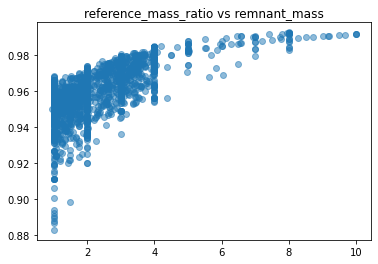

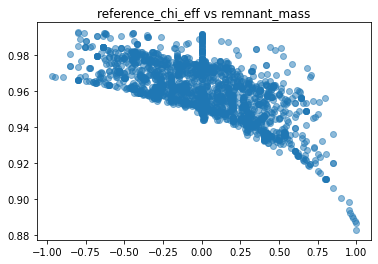

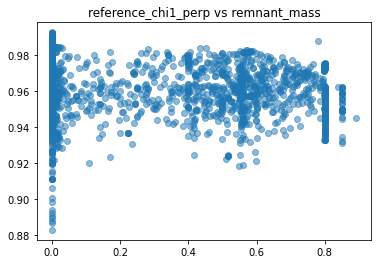

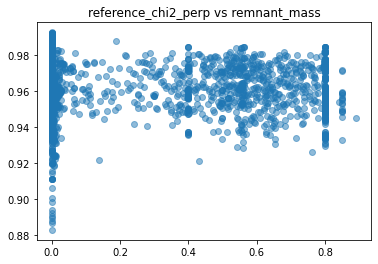

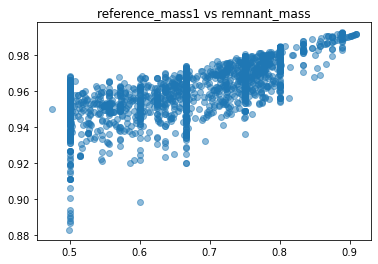

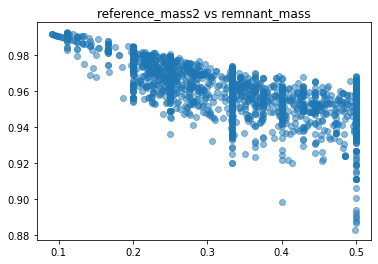

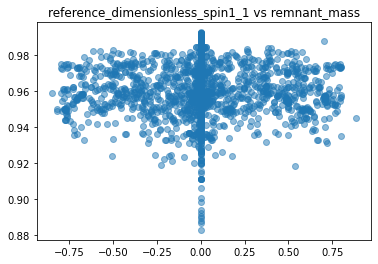

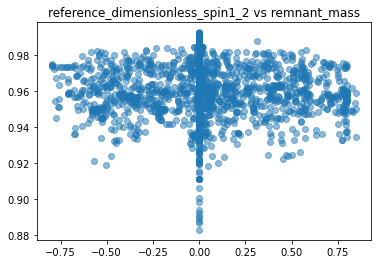

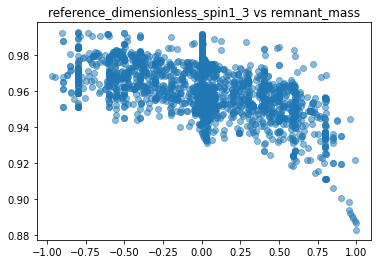

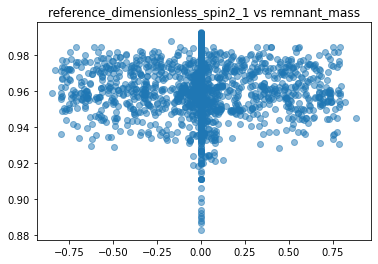

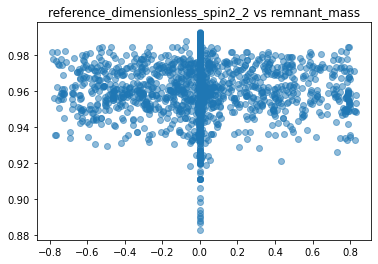

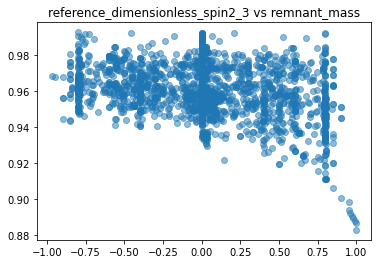

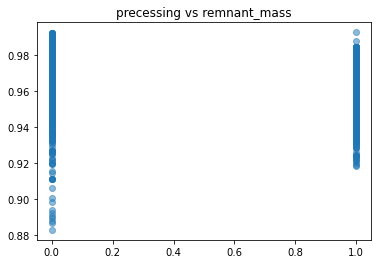

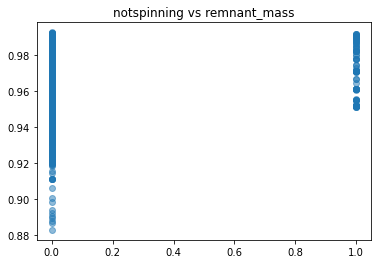

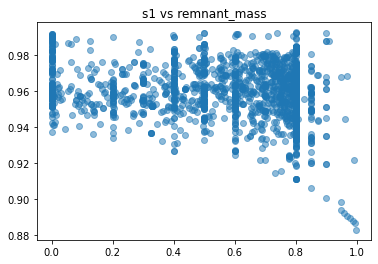

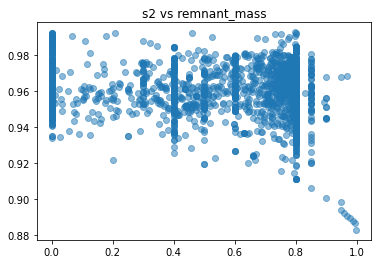

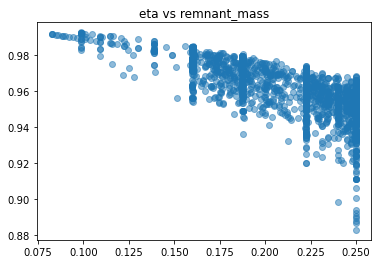

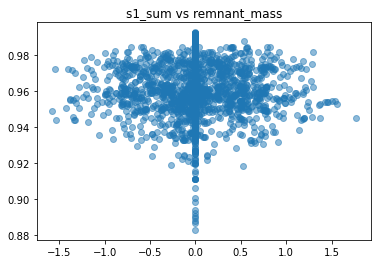

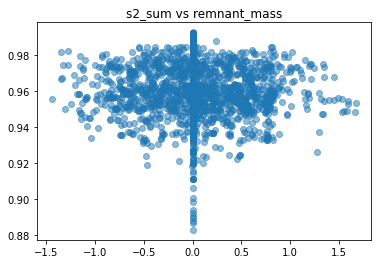

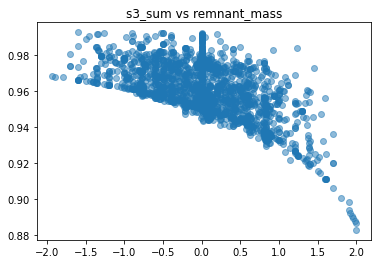

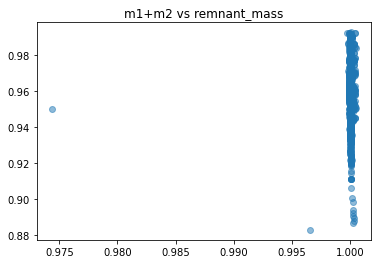

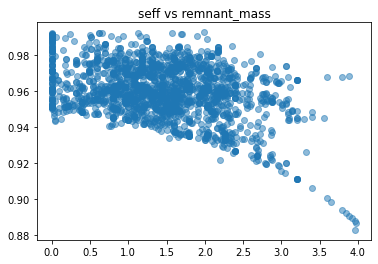

In [25]:
for i in X.columns:
    plt.scatter(X[i], y, alpha = 0.5)
    plt.title(i + ' vs remnant_mass')
    plt.show()

### From now on is NN 

In [27]:
from scikit.learn import train_test_split

ModuleNotFoundError: No module named 'scikit'

This is just a test to implement the following model
$$m_f=\omega_0+\omega_1 q+\omega_2 \chi^1_x+\omega_3 \chi^1_y+\omega_4 \chi^1_z+\omega_5 \chi^2_x+\omega_6 \chi^2_y+\omega_7 \chi^2_z$$

In [40]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=50)
X_train = X.sample(frac=0.6, replace=True, random_state=1)
X_test = X.sample(frac=0.4, replace=True, random_state=1)
y_train = y.sample(frac=0.6, replace=True, random_state=1)
y_test = y.sample(frac=0.4, replace=True, random_state=1)





In [29]:
Reg_Linear = linear_model.LinearRegression()
Linear_fit = Reg_Linear.fit(X_train,y_train)
Linear_predict = Linear_fit.predict(X_test)
mse_Linear = mean_squared_error(y_test,Linear_predict)
#Rsquared_Linear=Linear_fit.score(X_test,y_test)
#Rsquared_Linear_2=Linear_fit.score(X_train,y_train)

NameError: name 'linear_model' is not defined

In [ ]:
Linear_fit

In [ ]:
mse_Linear

In [30]:
import numpy as np
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import *
from keras.preprocessing import image
#from keras.applications import resnet50


Using TensorFlow backend.


In [31]:
len(df_ok.s1)

2016

In [59]:
model = Sequential()
# Layer 1
model.add(Dense(50, input_dim=22, activation='relu'))
# Layer 2
model.add(Dense(256, activation='relu'))
# Layer 3
model.add(Dense(256, activation='relu'))
# Layer 4
model.add(Dense(1, activation='linear'))
model.compile(loss="mean_squared_error", optimizer="adam")

In [60]:
model.summary()


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 50)                1150      
_________________________________________________________________
dense_14 (Dense)             (None, 256)               13056     
_________________________________________________________________
dense_15 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 257       
Total params: 80,255
Trainable params: 80,255
Non-trainable params: 0
_________________________________________________________________


In [ ]:
## Define Sequential model with 3 layers
model = keras.Sequential(
    [
        layers.Dense(2, activation="relu", name="layer1"),
        layers.Dense(3, activation="relu", name="layer2"),
        layers.Dense(4, name="layer3"),
    ]
)
# Call model on a test input


In [53]:
# Train the model with logger
fitted_model = model.fit(
    X_train,
    y_train,
    epochs=50,
    shuffle=True
)

Epoch 1/50
1210/1210 [==============================] - 0s 371us/step - loss: 0.0310
Epoch 2/50
1210/1210 [==============================] - 0s 81us/step - loss: 0.0017
Epoch 3/50
1210/1210 [==============================] - 0s 86us/step - loss: 6.7391e-04
Epoch 4/50
1210/1210 [==============================] - 0s 83us/step - loss: 4.6719e-04
Epoch 5/50
1210/1210 [==============================] - 0s 99us/step - loss: 3.3655e-04
Epoch 6/50
1210/1210 [==============================] - 0s 79us/step - loss: 2.6273e-04
Epoch 7/50
1210/1210 [==============================] - 0s 78us/step - loss: 1.9945e-04
Epoch 8/50
1210/1210 [==============================] - 0s 83us/step - loss: 1.7396e-04
Epoch 9/50
1210/1210 [==============================] - 0s 80us/step - loss: 1.5477e-04
Epoch 10/50
1210/1210 [==============================] - 0s 81us/step - loss: 1.3516e-04
Epoch 11/50
1210/1210 [==============================] - 0s 79us/step - loss: 1.1522e-04
Epoch 12/50
1210/1210 [==============

In [54]:
test_error_rate = model.evaluate(X_test, y_test, verbose=0)

In [55]:
test_error_rate

1.0974965666504675e-05

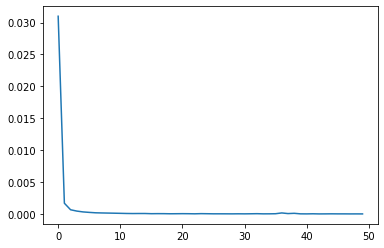

In [56]:
plt.plot(fitted_model.history['loss'])